<a href="https://colab.research.google.com/github/HaveFaith07/HaveFaith-Project/blob/Machine-Learning/FinalAssessmentBigDataAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Final Assessment of Big Data Analytics(M508B)

Name: Mitesh Patole

Student Number : GH1022321

The data which i have used in this assessment is imported from kaggle
URL: https://www.kaggle.com/code/lava18/all-that-you-need-to-know-about-the-android-market/input?select=googleplaystore_user_reviews.csv

The data set which i have selected for my NLP task indicates the user reviews of certain android applications, Herein we track down the application reviews and sentiments of the users, we can get insights of users based on the reviews and user sentiments if the user have delivered positive, negative , neutral response, with this evaluation we can track down the performance of the android application and predict the deliverance of the application to the user and their feelings over the same and the experience in order to make improvements, By analysing the response of the customer, we can further deliver the users with some offers, make improvement in the application, work on the pricing strategies etcetera. Thereby i am performing Sentiment Analysis for the same

Here we are installing Natural Language Preprocessing Toolkit

In [ ]:
!pip install nltk

We are thereby importing certain libraries in order to run certain steps as only after importing those we get access to the content and automate the calculations

In [ ]:
import pandas as pd
import numpy as np
import sklearn.model_selection
import sklearn.feature_extraction.text
from nltk.corpus import stopwords
from sklearn .model_selection import train_test_split
import nltk
import re
import string
import os
from nltk.stem import WordNetLemmatizer

Loading the data set

In [ ]:
df=pd.read_csv("googleplaystore_user_reviews.csv")
df.head()

Here we are locating the missing values in the data set and getting the sum of total number of missing value

In [ ]:
print("Missing values for train")
print(df.isna().sum())


Here we are downloading stopwords from the NLTK Toolkit, Stop words are certain words such as a , an It, the , in etc which does not concern us but is gonna add up to problems while running text classification in our case

In [ ]:
nltk.download('stopwords')
stopwords=nltk.corpus.stopwords.words('english')

Here we are converting the text to lowercase as this is gonna eliminate text constraint while running our tasks and thereby we eliminate every punctuations in the text in order to just work on the strings

In [ ]:
def remove_punc(x):
    return ''.join([i for i in x if i not in string.punctuation]).lower()

Here we split the sentences into words and strike out all the punctuations for example if we have a sentence which consists of    "," "." "!", we split the words from those punctuations

In [ ]:
def spilt_txt(x):
    return re.split('\W+',x)

Here , we use lemmatizer in order to what we did before was to remove the stop words and the rest of the words which are not in the stop words library we just are left out with that content

In [ ]:
lemma=WordNetLemmatizer()
def remove_stop(x):
    return ' '.join([lemma.lemmatize(i) for i in x if i not in stopwords])

Here, we count the total number of values in the "Sentiment" column in our training data set

In [ ]:
df['Sentiment'].value_counts()

Here, we look for the unique values in the "Sentiment" column in our training data set

In [ ]:
df['Sentiment'].unique()

Here we look for the sum of null values in our df(DATAFrame)

In [ ]:
df.isnull().sum()

Here we look for the sum of null values in df

In [ ]:
df.isnull().sum()

We are now downloading the wordnet from the Natural Language preprocessing toolkit

In [ ]:
nltk.download('wordnet')

Here we convert our content in the specific column into numbers, because its essential to run specifi machine learning tasks

In [ ]:
def change(x) :
    dic={'Positive':2, 'Neutral':1, 'Extremely Positive':2, 'Extremely Negative':0,
       'Negative':0,'Unknown':0}
    return dic[x]

Here we are applying the steps which we made earlier of removing punctuations, splitting text, removing stop words to the data set after we merged the df_train, test altogether and fixing the missing values

In [ ]:
df['Translated_Review'] = df['Translated_Review'].fillna('')
df['Sentiment'] = df['Sentiment'].fillna('Unknown')

df['Translated_Review']=df['Translated_Review'].apply(lambda x:remove_punc(x))
df['Translated_Review']=df['Translated_Review'].apply(lambda x:spilt_txt(x))
df['Translated_Review']=df['Translated_Review'].apply(lambda x:remove_stop(x))
df['Sentiment'] = df['Sentiment'].apply(lambda x: change(x) if x != '' else 0)

Here, we are using CountVectorizer and TFIDFVectorizer to the text as these are widely used techniques in the NLP tasks like text classification, sentiment analysis etcetera.

Count Vectorizer is a Preprocessing technique which is used to convert a collection of text into a matrix which represent the freuqency of the word, it also performs tokenization, where we split texts into words based on punctuations
TFIDF Vectorizer counts the number of times a words is used in the data and assigns the priority of the word in the data hence we multiply the number of times it appears in the data with the rarity of the same to track down the importance of certain text

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer
tf_tranform=TfidfVectorizer()
x_tf=tf_tranform.fit_transform(df['Translated_Review'])
count_tranform=CountVectorizer()
x_count=count_tranform.fit_transform(df['Translated_Review'])

Here, we split the data into x_train,test and y_train and test

In [ ]:
from sklearn.model_selection import train_test_split

data = df[:x_count.shape[0]]

x_train, x_test, y_train, y_test = train_test_split(x_count, data['Sentiment'], test_size=0.2, random_state=42)

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


Here, we have used standard scaler in order to scale the data because in order to run our algorithm we need to scale the data as the data is vast and wont run accurately without standardization, in order to equally interact with every data so that the one's with higher value dont affect the other value

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = sklearn.preprocessing.StandardScaler(with_mean = False)
scaler.fit(x_train)

x_train = scaler.transform(x_train)

x_test = scaler.transform(x_test)


Here, we use PCA as the data is huge and we need to split the data into smaller groups in order to precisely implement machine learning algorithms hence we reduce the dimensionality first to 5000 and understand the data  and then transform into dimensions of 100, inorder to run precisely

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
pca.fit(x_count[:5000].toarray())
pca_mod=pca.transform(x_count[:100].toarray())


Here, we implement the machine learning algorithm of Logistic Regression, Logistic Regression is widely used in classification tasks and is widely used in binary classification

In [ ]:

from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(x_train,y_train)


Here we find out the accuracy, precision,recall, F1-score and Confusion matrix of the model we have trained

In [ ]:
y_predicted=model_lr.predict(x_test)
accuracy=sklearn.metrics.accuracy_score(y_test,y_predicted)
cm=sklearn.metrics.confusion_matrix(y_test,y_predicted)
precision,recall,f1,support=sklearn.metrics.precision_recall_fscore_support(y_test,y_predicted)

print("Accuracy =",accuracy)
print("Precision",precision)
print("Recall",recall)
print("F1-score",f1)
print("Confusion Matrix:\n",cm)


In [ ]:
!jupyter nbconvert --to html FinalAssessmentBigDataAnalytics.ipynb

[NbConvertApp] Converting notebook FinalAssessmentBigDataAnalytics.ipynb to html
[NbConvertApp] Writing 810993 bytes to FinalAssessmentBigDataAnalytics.html


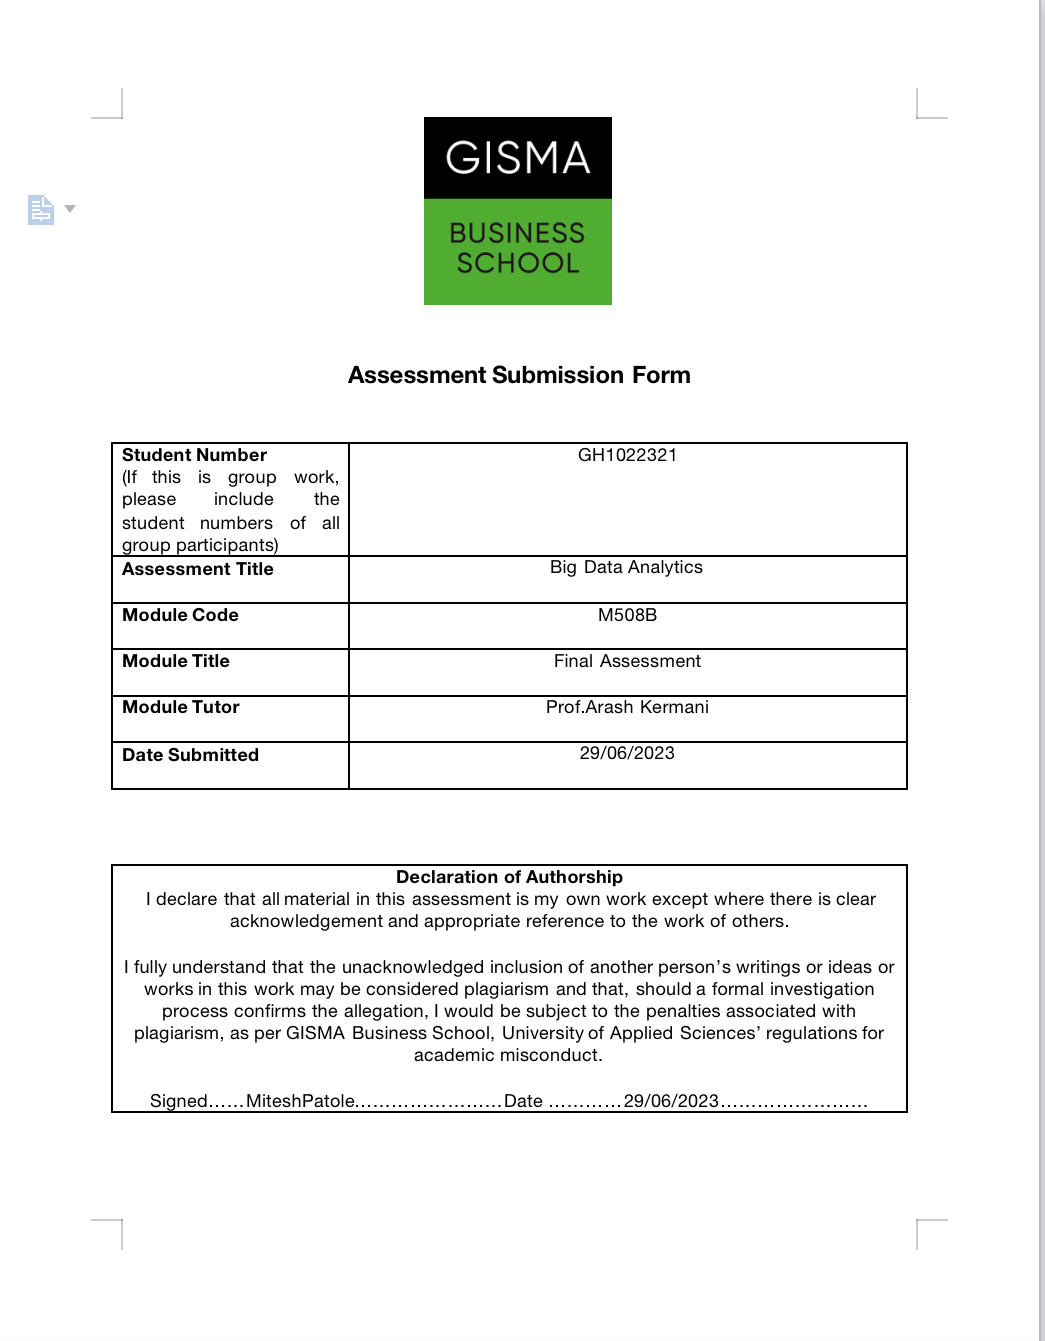